In [1]:
%load_ext autoreload
%autoreload 2

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
from astroduet import config
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

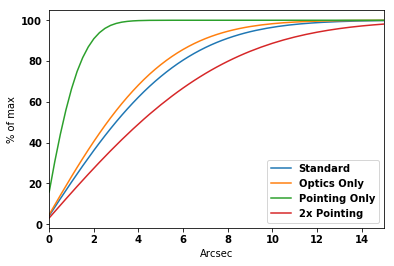

In [13]:
duet = config.Telescope()
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

eef_standard = rad_pro.cumsum()
plt.plot(rind, 100*eef_standard / eef_standard.max(), label='Standard')


duet = config.Telescope()
duet.pointing_rms = 1*u.arcsec
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)

eef_optics = rad_pro.cumsum()
plt.plot(rind, 100*eef_optics / eef_optics.max(), label='Optics Only')


duet.psf_params['sig'] = [1*u.arcsec]
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

eef_pointing = rad_pro.cumsum()

plt.plot(rind, 100*eef_pointing / eef_pointing.max(), label='Pointing Only')


duet = config.Telescope()
duet.pointing_rms = 5*u.arcsec
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)
eef_req_pnt = rad_pro.cumsum()


plt.plot(rind, 100*eef_req_pnt / eef_req_pnt.max(), label='2x Pointing')



plt.xlim([0, 15])
plt.xlabel('Arcsec')
plt.ylabel('% of max')
plt.legend()
plt.show()



f = open('eef_test.txt', 'w')
f.write('Radius(arcsec) Standard OpticsOnly PointingOnly 2xPointingRMS\n')


for ri, e1, e2, e3, e4 in zip(rind.value, eef_standard, eef_optics, eef_pointing, eef_req_pnt):
    f.write('{} {} {}\n'.format(ri, e1 / eef_standard.max(), e2 / eef_optics.max(),
                                e3 / eef_pointing.max(), e4 / eef_req_pnt.max()))
f.close()


In [7]:
duet = config.Telescope()

duet.pointing_rms = 5*u.arcsec

print(duet.calc_psf_fwhm())


15.200000000000001 arcsec


In [14]:
from astroduet.utils import get_neff

In [16]:
get_neff(15.2*u.arcsec, duet.pixel)

13.291955734302025

In [17]:
duet2 = config.Telescope()
duet2.neff

8.093811494551119